# ``Statistics Exercise`` - **``Solution``**

## __Import Library__

In [117]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)

## __Open Dataset__

In [118]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


<hr>

## **Nomor 1**

Tampilkan statistik deskriptif pada variabel **Rooms, Distance, Landsize**, dan **Price**!

In [119]:
df[['Rooms', 'Distance', 'Landsize', 'Price']].describe()

,Rooms,Distance,Landsize,Price
count,13580.000000,13580.000000,13580.000000,1.358000e+04
mean,2.937997,10.137776,558.416127,1.075684e+06
std,0.955748,5.868725,3990.669241,6.393107e+05
min,1.000000,0.000000,0.000000,8.500000e+04
25%,2.000000,6.100000,177.000000,6.500000e+05
50%,3.000000,9.200000,440.000000,9.030000e+05
75%,3.000000,13.000000,651.000000,1.330000e+06
max,10.000000,48.100000,433014.000000,9.000000e+06


<hr>

## **Nomor 2**

a) Berapa jumlah **Rooms** pada rumah yang harganya paling mahal?


In [120]:
df['Price'].max()

9000000.0

In [121]:
df[df['Price'] == df['Price'].max()][['Rooms']]

,Rooms
12094,3


b) Berapa rata-rata harga rumah yang jarak ke CBD (variabel **Distance**) terdekat?


In [122]:
df['Distance'].min()

0.0

In [123]:
df[df['Distance'] == df['Distance'].min()]['Price'].mean()

671166.6666666666

c) Berapa rata-rata harga rumah yang luas tanahnya (variabel **Landsize**) 1 kali standar deviasi di atas rata-rata luas tanah?


In [124]:
land_mean = df['Landsize'].mean()
land_std = df['Landsize'].std()

df[(df['Landsize'] > land_mean) & (df['Landsize'] <= (land_mean + 1*land_std))]['Price'].mean()

1267231.1335863378

d) Berapa rentang (_range_) harga rumah (variabel **Price**) pada region ``Southern Metropolitan ``?

In [125]:
df_sm = df[df['Regionname'] == 'Southern Metropolitan']

price_range = df_sm['Price'].max() - df_sm['Price'].min()
price_range

7869000.0

<hr>

## **Nomor 3**

* Nilai outlier adalah nilai yang berada di bawah ``Q1 - (1.5 * IQR)`` atau di atas ``Q3 + (1.5 * IQR)``
* Hitung dulu Q1, Q2, dan IQR pada pada kolom **Price** (harga rumah)
* Hitung ada berapa nilai outlier pada kolom **Price**!

In [126]:
q1 = df['Price'].describe()['25%']
q3 = df['Price'].describe()['75%']

iqr = q3 - q1
iqr

680000.0

In [148]:
batas_bawah = q1 - (1.5 * iqr)
batas_atas = q3 + (1.5 * iqr)

batas_bawah, batas_atas

(-370000.0, 2350000.0)

In [128]:
outlier_price = df[(df['Price'] < batas_bawah) | (df['Price'] > batas_atas)][['Price']]
outlier_price.head()

,Price
80,2850000.0
92,2615000.0
97,2575000.0
102,3010000.0
103,2800000.0


In [129]:
# jumlah outlier pada kolom 'Price'
len(outlier_price)

612

In [130]:
outlier_price.index

Int64Index([   80,    92,    97,   102,   103,   108,   112,   118,   124,
              233,
            ...
            13466, 13468, 13474, 13483, 13518, 13521, 13523, 13553, 13555,
            13578],
           dtype='int64', length=612)

<AxesSubplot:xlabel='Price'>

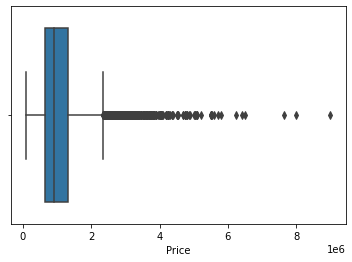

In [131]:
sns.boxplot(data=df, x='Price')

<hr>

## **Nomor 4**

#### **``Shapiro Wilk Test``**

Menguji asumsi normalitas variabel ``Price``

#### **Interpretation**
* If the P-Value of the Shapiro Wilk Test is larger than 0.05, we assume a normal distribution
* If the P-Value of the Shapiro Wilk Test is smaller than 0.05, we do not assume a normal distribution

In [132]:
from scipy.stats import shapiro

sw_statistic, sw_pvalue = shapiro(df['Price'])

if sw_pvalue > 0.05:
    print(f'P-value: {sw_pvalue}. Kita mengasumsikan variable Price memiliki normal distribution')
else:
    print(f'P-value: {sw_pvalue}. Kita TIDAK mengasumsikan variable Price memiliki normal distribution')

P-value: 0.0. Kita TIDAK mengasumsikan varable Price memiliki normal distribution


C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### **``D’Agostino and Pearson’s Test``**

Menguji asumsi normalitas variabel ``Price``

#### **Interpretation**
* If the P-Value of the D'Agostino-Pearson Test is larger than 0.05, we assume a normal distribution
* If the P-Value of the D'Agostino-Pearson Test is smaller than 0.05, we do not assume a normal distribution

In [149]:
from scipy.stats import normaltest
dp_statistic, dp_pvalue = normaltest(df['Price'])

if dp_pvalue > 0.05:
    print(f'P-value: {dp_pvalue}. Kita mengasumsikan variable Price memiliki normal distribution')
else:
    print(f'P-value: {dp_pvalue}. Kita TIDAK mengasumsikan variable Price memiliki normal distribution')

P-value: 0.0. Kita TIDAK mengasumsikan variable Price memiliki normal distribution


<hr>

## **Nomor 5**

Jika diasumsikan telah memenuhi syarat statistik parametrik, hitung seberapa kuat korelasi variabel **Rooms** dengan **Price**, serta arah korelasinya!

In [134]:
df['Rooms'].corr(df['Price'], method = 'pearson')

# Moderate (strength) Positif (trend) 

0.4966336761865398

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

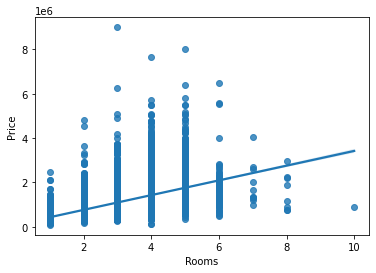

In [150]:
sns.regplot(data=df, x='Rooms', y='Price')

<hr>

## **Nomor 6**

Jika diasumsikan telah memenuhi syarat statistik parametrik, dari beberapa Regionname manakah **Regionname** yang variabel jumlah kamarnya (**Rooms**) memiliki korelasi terkuat dengan variabel harga rumah (**Price**)!

In [135]:
# menampilkan semua category dalam Regionname
df['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [153]:
df[df['Regionname'] == 'Northern Metropolitan']['Price']

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13537     465000.0
13562    1450000.0
13563    1271000.0
13572     650000.0
13574     582000.0
Name: Price, Length: 3890, dtype: float64

In [136]:
# contoh untuk menampilkan korelasi Rooms vs Price pada suatu category dalam Regionname
df[df['Regionname'] == 'Northern Metropolitan']['Rooms'].corr(df[df['Regionname']=='Northern Metropolitan']['Price'], method= 'pearson')

0.3928134583022425

In [137]:
# Menampilkan korelasi Rooms vs Price pada tiap category dalam Regionname

for i in df['Regionname'].unique():
    print(f"{df[df['Regionname'] == i]['Rooms'].corr(df[df['Regionname']==i]['Price'], method= 'pearson')} : {i}")

0.3928134583022425 : Northern Metropolitan
0.47603029384349654 : Western Metropolitan
0.6837438462796419 : Southern Metropolitan
0.5029928557468853 : Eastern Metropolitan
0.2677994408114052 : South-Eastern Metropolitan
0.31442339534695335 : Eastern Victoria
0.36114429890812744 : Northern Victoria
0.5518865952271457 : Western Victoria


In [156]:
# variable corr ini untuk menyimpan nilai korelasinya
corr = []

# tiap nilai korelasi akan diappend ke dalam variabel corr
for i in df['Regionname'].unique():
    corr.append(df[df['Regionname'] == i]['Rooms'].corr(df[df['Regionname']==i]['Price'], method= 'pearson'))

# menampilkan dalam bentuk dataframe 
pd.DataFrame(data = corr, index = df['Regionname'].unique(), columns = ['Correlation Price vs Rooms']).sort_values(by='Correlation Price vs Rooms', ascending=False)

,Correlation Price vs Rooms
Southern Metropolitan,0.683744
Western Victoria,0.551887
Eastern Metropolitan,0.502993
Western Metropolitan,0.476030
Northern Metropolitan,0.392813
Northern Victoria,0.361144
Eastern Victoria,0.314423
South-Eastern Metropolitan,0.267799


In [154]:
corr

[-0.36855199617905166,
 -0.33408555047092126,
 0.0024891492189334065,
 -0.12435562852683701,
 -0.2855640518908052,
 -0.34569916122464595,
 0.08956649327360579,
 -0.04606415345276125]

In [160]:
df.groupby('Regionname')['Rooms'].corr(df['Price']).sort_values(ascending=False)

Regionname
Southern Metropolitan         0.683744
Western Victoria              0.551887
Eastern Metropolitan          0.502993
Western Metropolitan          0.476030
Northern Metropolitan         0.392813
Northern Victoria             0.361144
Eastern Victoria              0.314423
South-Eastern Metropolitan    0.267799
Name: Rooms, dtype: float64

Korelasi terkuat ada pada Regionname Southern Metropolitan dengan nilai korelasi 0.683744

<hr>

## **Nomor 7**

Jika diasumsikan **tidak** memenuhi syarat statistik parametrik, hitung seberapa kuat korelasi variabel **Distance** dengan **Price**, serta arah korelasinya!

In [139]:
df['Distance'].corr(df['Price'], method='spearman')

# Very Weak (strength) Negative (trend)

-0.12998984131880323

<AxesSubplot:xlabel='Distance', ylabel='Price'>

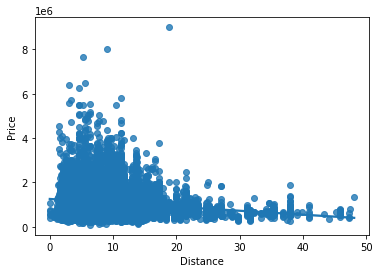

In [161]:
sns.regplot(data=df, x='Distance', y='Price')

<hr>

## **Nomor 8**

Jika diasumsikan telah memenuhi syarat statistik parametrik, dari beberapa Regionname manakah **Regionname** yang variabel jumlah jarak ke CBD (**Distance**) paling tidak berkorelasi dengan variabel harga rumah (**Price**)! Serta tampilkan juga Regionname yang paling berkorelasi kedua variabel ini!

In [140]:
# Menampilkan korelasi Distance vs Price pada tiap category dalam Regionname

for i in df['Regionname'].unique():
    print(f"{df[df['Regionname'] == i]['Distance'].corr(df[df['Regionname']==i]['Price'], method= 'pearson')} : {i}")

-0.36855199617905166 : Northern Metropolitan
-0.33408555047092126 : Western Metropolitan
0.0024891492189334065 : Southern Metropolitan
-0.12435562852683701 : Eastern Metropolitan
-0.2855640518908052 : South-Eastern Metropolitan
-0.34569916122464595 : Eastern Victoria
0.08956649327360579 : Northern Victoria
-0.04606415345276125 : Western Victoria


In [141]:
corr = []
for i in df['Regionname'].unique():
    corr.append(df[df['Regionname'] == i]['Distance'].corr(df[df['Regionname']==i]['Price'], method= 'pearson'))
    
pd.DataFrame(data = corr, index = df['Regionname'].unique(), columns = ['Correlation Price vs Distance']).sort_values('Correlation Price vs Distance', ascending=True)

,Correlation Price vs Distance
Northern Metropolitan,-0.368552
Eastern Victoria,-0.345699
Western Metropolitan,-0.334086
South-Eastern Metropolitan,-0.285564
Eastern Metropolitan,-0.124356
Western Victoria,-0.046064
Southern Metropolitan,0.002489
Northern Victoria,0.089566


In [162]:
df.groupby('Regionname')['Distance'].corr(df['Price']).sort_values(ascending=False)

Regionname
Northern Victoria             0.089566
Southern Metropolitan         0.002489
Western Victoria             -0.046064
Eastern Metropolitan         -0.124356
South-Eastern Metropolitan   -0.285564
Western Metropolitan         -0.334086
Eastern Victoria             -0.345699
Northern Metropolitan        -0.368552
Name: Distance, dtype: float64

* Regionname yang paling tidak berkorelasi atau korelasinya paling lemah di dua variabel di atas adalah **Sourthern Metropolitan** (0.002489 atau 0.24 persen).
* Regionname yang paling berkorelasi di dua variabel di atas adalah **Northern Metropolitan** (-0.368552 atau - 36,86 persen)

<hr>

## **Nomor 9**

Uji hipotesis apakah metode pembelian/**Method** berkaitan dengan **Type** / tipe rumah (dependen) atau tidak saling berkaitan (independen)!

In [163]:
df[['Method','Type']].head()

,Method,Type
0,S,h
1,S,h
2,SP,h
3,PI,h
4,VB,h


In [165]:
# contingency table/cross tab
df_ct = pd.crosstab(index=df['Type'], columns=df['Method'])
df_ct

Method,PI,S,SA,SP,VB
Type,,,,,
h,1069,6507,66,1079,728
t,134,723,7,143,107
u,361,1792,19,481,364


#### **Hypothesis:**
* Ho : varible Method dan Type independent (tidak berkaitan)
* Ha : varible Method dan Type dependent (berkaitan)

In [166]:
from scipy.stats import chi2_contingency

stat, pvalue, dof, expected = chi2_contingency(df_ct)

# conclusion
alpha = 0.05
print('p-value:', pvalue)

if pvalue > alpha:
    print('pvalue > 0.05. Failed to reject H null. Variable Method dan Type independent (tidak berkaitan)')
else:
    print('pvalue <= 0.05. Reject H null. Varible Method dan Type dependent (berkaitan)')

p-value: 3.183702485154384e-22
pvalue <= 0.05. Reject H null. Varible Method dan Type dependent (berkaitan)


<hr>

## **Nomor 10**

Uji hipotesis apakah rata-rata harga rumah (**Price**) antar Regionname berbeda ataukah sama!

Diasumsikan persyaratan statistik parametrik terpenuhi

**Hipotesis**:
* Ho : μ1 = μ2 = … = μk (Rata-rata harga rumah pada semua Regionname sama)  
* Ha : Setidaknya ada satu pasang Regionname yang rata-rata harga rumahnya tidak sama, tapi kita tidak tahu yang mana

In [144]:
df['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [171]:
from scipy.stats import f_oneway

stat, pvalue = f_oneway(df[df['Regionname'] == 'Northern Metropolitan']['Price'],
                        df[df['Regionname'] == 'Western Metropolitan']['Price'],
                        df[df['Regionname'] == 'Southern Metropolitan']['Price'],
                        df[df['Regionname'] == 'Eastern Metropolitan']['Price'],
                        df[df['Regionname'] == 'South-Eastern Metropolitan']['Price'],
                        df[df['Regionname'] == 'Eastern Victoria']['Price'],
                        df[df['Regionname'] == 'Northern Victoria']['Price'],
                        df[df['Regionname'] == 'Western Victoria']['Price'],
                        )

stat, pvalue

(284.40018651008097, 0.0)

In [172]:
[i*2 for i in range(1,6)]

[2, 4, 6, 8, 10]

In [170]:
f_oneway(*[df[df['Regionname'] == i]['Price'] for i in df['Regionname'].unique()])

F_onewayResult(statistic=284.40018651008097, pvalue=0.0)

In [167]:
# conclusion
alpha = 0.05
print(f'p-value: {pvalue:.10f}')
print(f'f-stat: {stat:.10f}')


if pvalue > alpha:
    print('pvalue > 0.05. Failed to reject H null. Semua rata-rata harga rumah untuk tiap Regionname adalah sama')
else:
    print('pvalue <= 0.05. Reject H null. Minimal ada 1 category Regionname yang rata-rata harga rumahnya berbeda dari yang lain. Tapi kita tidak tahu yg mana')

p-value: 0.0000000000
f-stat: 120.0851942552
pvalue <= 0.05. Reject H null. Minimal ada 1 category Regionname yang rata-rata harga rumahnya berbeda dari yang lain. Tapi kita tidak tahu yg mana


p-value kurang dari sama dengan 0.05 maka cukup bukti untuk menolak Ho.
Artinya ada minimal ada 1 Regionname yang rata-ratanya berbeda dari yang lain, tapi kita tidak tahu yang mana.

In [168]:
# Melihat rata-rata Price untuk tiap category Regionname
df.groupby('Regionname').mean()[['Price']].sort_values('Price', ascending=False)

,Price
Regionname,
Southern Metropolitan,1.372963e+06
Eastern Metropolitan,1.104080e+06
South-Eastern Metropolitan,9.229438e+05
Northern Metropolitan,8.981711e+05
Western Metropolitan,8.664205e+05
Eastern Victoria,6.999808e+05
Northern Victoria,5.948293e+05
Western Victoria,3.975234e+05


<hr>

## **Thank you & Keep Learning**